# Problem set #3
### by Alexander Tyan, February 4, 2018

## 1). Multiple linear regression (4 points). For this problem, you will use the 397 observations from the Auto.csv dataset. This dataset includes 397 observations on miles per gallon (mpg), number of cylinders (cylinders), engine displacement (displacement), horsepower (horsepower), vehicle weight (weight), acceleration (acceleration), vehicle year (year), vehicle origin (origin), and vehicle name (name).

### a). Import the data using pandas.read csv() function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the na values=... option.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Ignore the warning that comes up. Most issue boards suggest that this module is not
# really depreciated
import statsmodels.api as sm

auto_df = pd.read_csv("Auto.csv", na_values=["?"])

/Users/alexander/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### b). Produce a scatterplot matrix which includes all of the quantitative variables (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin). [Use the pandas scatterplot function in the code block below.]

<IPython.core.display.Javascript object>


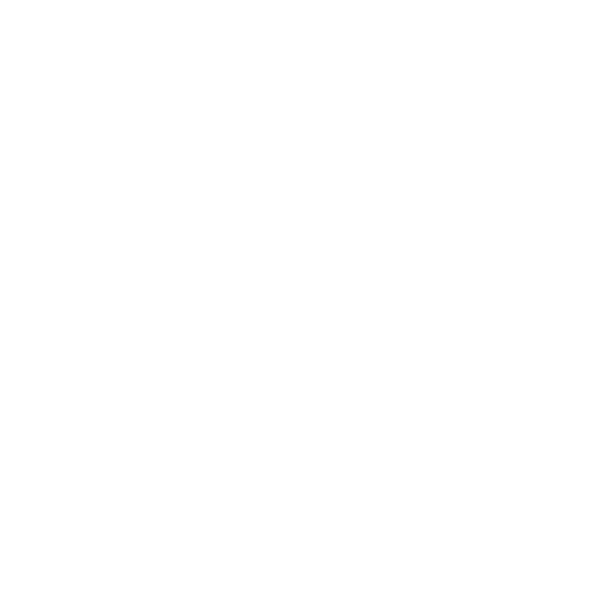

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150ec9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115e93780>]], dtype=object)

In [2]:
from pandas.plotting import scatter_matrix
%matplotlib notebook
scatter_matrix(auto_df, alpha=0.3, figsize=(6, 6),
diagonal='kde')

### c). Compute the correlation matrix for the quantitative variables (8x8) using the DataFrame.corr() method.

In [3]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### d). Estimate the following multiple linear regression model of mpg on all other quantitative variables, where ui is an error term for each observation, using Python's statsmodels.api.OLS() function.

In [4]:
# Run OLS regression:
auto_df["constant_x0"] = 1
ols_regression = sm.OLS(endog=auto_df["mpg"], exog=auto_df[["constant_x0", "cylinders", "displacement", 
                                                           "horsepower", "weight", 
                                                           "acceleration", "year", "origin"]],
                       missing="drop")

In [5]:
# Estimate parameters:
results = ols_regression.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        03:11:53   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant_x0    -17.2184      4.644     -3.707   

##### So the model with the estimates is:
##### mpg =  -17.2184 - 0.4934 \* cylinders + 0.0199 \* displacement - 0.0170 \* horsepower - 0.0065 \* weight + 0.0806 \* acceleration + 0.7508 \* year + 1.4261 \* origin

#### i). Which of the coeffcients is statistically signicant at the 1% level?

##### Coefficients for the displacement (0.0199 at p-value of 0.008), weight (-0.0065 at p-value of 0.000), year (0.7508 at p-value of 0.000), and origin (1.4261at p-value of 0.000) (all p-values < 0.01) (as well as the constant)

#### ii). Which of the coeffcients is NOT statistically significant at the 10% level?

##### Coefficients for the cylinders (-0.4934 at p-value of 0.128), horsepower (-0.0170 at p-value of 0.220), acceleration (0.0806 at p-value of 0.415) (all p-values > 0.01)

#### iii). Give an interpretation in words of the estimated coefficient beta_hat_6 on year_i using the estimated value of beta_hat_6.

##### Based on our estimates using this data, an increase of 1 year in the vehicle year (i.e. one year newer car) results in a predicted 0.7508 miles per gallon increase for a vehicle (more modern vehicles get better mileage).

### e). Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with mpg_i?

##### Displacement, horsepower, and weight (looks like exponential decay graph)

#### i). Estimate a new multiple regression model by OLS in which you include squared terms on the three variables you identified as having a nonlinear relationship to mpg_i as well as a squared term on acceleration_i.

In [6]:
auto_df["displacement_sq"] = auto_df["displacement"] ** 2
auto_df["horsepower_sq"] = auto_df["horsepower"] ** 2
auto_df["weight_sq"] = auto_df["weight"] ** 2
auto_df["acceleration_sq"] = auto_df["acceleration"] ** 2

In [7]:
ols_regression_2 = sm.OLS(endog=auto_df["mpg"], exog=auto_df[["constant_x0", "cylinders", "displacement",
                                                              "displacement_sq", "horsepower", "horsepower_sq",
                                                              "weight", "weight_sq", "acceleration", 
                                                              "acceleration_sq", "year", "origin"]], 
                          missing="drop")

In [8]:
# Estimate parameters:
results_2 = ols_regression_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        03:11:53   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant_x0        20.1084      6.696     

Coefficients are significant at p < 0.01 for horsepower, squared horsepower, weight, squared weight, acceleration, squared acceleratio, year, and origin (as well as the constant). However coefficients on squared displacement, squared horsepower, weight, squared weight are very small, suggesting a weak association between these variables and miles per gallon.

#### ii). Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (d)?

Previous adjusted R^2 = 0.818.
New adjusted R^2 = 0.866
The new one is a little better than the previous one, without squared terms, i.e. about 5% more variance in the mpg explained in the new model.

#### iii). What happened to the statistical significance of the displacement_i variable coeffcient and the coeffcient on its squared term?

In the model WITHOUT the squared terms, displacement coefficient and its statistical significance were: 0.0199 and 0.008 respectively, i.e. significant at 0.01 level and an expected increase of 0.02 miles per gallon per one unit increase in engine displacement.
In the model WITH the squared terms, displacement coefficient and its statistical significance were: -0.0169 and 0.408 respectively and for the squared displacement: 2.257\*10^-05 coefficient and 0.532 for p-value.
So in the new model, displacement coefficient changed from positive to negative, indicating displacement increase associated with miles per gallon DECREASE, but **the coefficient estimate is no longer significant**: 0.408 > 0.01. Also, displacement squared coefficient is very small and insignificant at 0.01. 

#### iv). What happened to the statistical signicance of the cylinders variable?

The statistical significant of the cylinders variable decreased from 0.128 in the old model to 0.440 in the new model. In both cases the estimate is insignificant, but even more so in the new model.

### (f) Using the regression model from part (e) and the .predict() function, what would be the predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1?

In [9]:
import numpy as np

mean_cylinders = np.mean(auto_df["cylinders"])
mean_displacement = np.mean(auto_df["displacement"])
mean_displacement_sq = np.mean(auto_df["displacement_sq"])
mean_horsepower = np.mean(auto_df["horsepower"])
mean_horsepower_sq = np.mean(auto_df["horsepower_sq"])
mean_weight = np.mean(auto_df["weight"])
mean_weight_sq = np.mean(auto_df["weight_sq"])
mean_acceleration = np.mean(auto_df["acceleration"])
mean_acceleration_sq = np.mean(auto_df["acceleration_sq"])
mean_year = np.mean(auto_df["year"])
mean_origin = np.mean(auto_df["origin"])

cylinder_val = 6
displacement_val = 200
horsepower_val = 100
weight_val = 3100
accelaration_val = 15.1
year_val = 99
origin_val = 1

results_2.predict(exog=[1, cylinder_val, displacement_val, displacement_val ** 2, 
                        horsepower_val, horsepower_val ** 2, weight_val, weight_val ** 2, 
                        accelaration_val, accelaration_val ** 2, year_val, origin_val])

array([ 38.7321111])

Predicted miles per gallon = 38.73

## 2). Classification problem: KNN by hand and in Python (3 points). Thetable below provides a training data set containing six observations, three predictors, and one qualitative response variable.

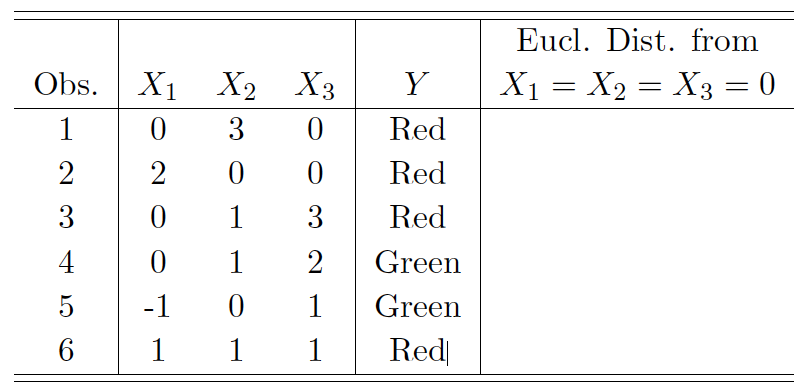

In [10]:
from IPython.display import Image
Image("images/KNN_data.png")

## Suppose we wish to use this data set to make a prediction for Y when X1 =X2 = X3 = 0 using K-nearest neighbors.

### i). Compute the Euclidean distance between each observation and the test point X1 = X2 = X3 = 0.
$$ d(p,q) = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + (q_3-p_3)^2} $$

In [11]:
data = np.array([(0, 0, 0),(0, 3, 0), (2, 0, 0), (0, 1, 3), (0, 1, 2), (-1, 0, 1), (1, 1, 1)])
data

array([[ 0,  0,  0],
       [ 0,  3,  0],
       [ 2,  0,  0],
       [ 0,  1,  3],
       [ 0,  1,  2],
       [-1,  0,  1],
       [ 1,  1,  1]])

In [12]:
# Euclidean distances:
counter = 1
for row in data[1:]:
    print("Distance from observation {}: ".format(counter), np.sqrt(sum((row - data[0]) ** 2)))
    counter += 1

Distance from observation 1:  3.0
Distance from observation 2:  2.0
Distance from observation 3:  3.16227766017
Distance from observation 4:  2.2360679775
Distance from observation 5:  1.41421356237
Distance from observation 6:  1.73205080757


### ii). What is our KNN prediction with K = 1? Why?

Observation 5 color "Green" is our KNN prediction, because we need K = 1 nearest neighbour and observation 5 is 1.41 distance away, which is the smallest distance we have.

### iii). What is our KNN prediction with K = 3? Why?

Observations 2, 5, and 6 are our nearest neighbors, with colors "Red", "Green", "Red", respecively. So "Red" is our KNN prediction, because two out of three nearest neighbours are "Red."

## d). If the Bayes (optimal) decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

Small, because with higher K, the decision boundary will be smoother and more linear, but if the decision boundary is highly non-linear, then we need this more linear line because a straight/smoother line would be likely underfitting the data, so we need higher K for a better fit. To think about this further, smaller K will have more classifying precision as the range around X0 will can be smaller on average to capture a smaller number of neighbours, but then estimate boundaries will be more jagged (but more precise); and vice-versa.

## e). Use Python's scikit-learn library to estimate the KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2.

In [13]:
from sklearn import neighbors

In [14]:
X_values = data[1:]
y_values = np.array(['red', 'red', 'red', 'green', 'green', 'red'])
print(X_values)
print(y_values)
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_values, y_values)
test_point = np.array([(1, 1, 1)])
print("KNN Prediction for {}: ".format(str(test_point)), knn.predict(test_point))

[[ 0  3  0]
 [ 2  0  0]
 [ 0  1  3]
 [ 0  1  2]
 [-1  0  1]
 [ 1  1  1]]
['red' 'red' 'red' 'green' 'green' 'red']
KNN Prediction for [[1 1 1]]:  ['green']


KNN Prediction for X1 = X2 = X3 = 1: "Green"

## 3). Multivariable logistic (logit) regression (3 points). In this problem, you will use the Auto.csv dataset from Exercise 1. We will study the factors that make miles per gallon high or low. Create a binary variable mpg_high that equals 1 if mpg_high >= median(mpg_high) and equals 0 if mpg_high < median(mpg_high).

In [15]:
auto_df = pd.read_csv("Auto.csv", na_values=["?"])
# Drop na's which come from horsepower:
auto_df.dropna(inplace=True)

mpg_median = auto_df["mpg"].median()
auto_df["mpg_high"] = 0
auto_df.loc[auto_df["mpg"] > mpg_median, "mpg_high"] = 1

### a). Use statsmodel.api to estimate the logistic regression of mpg_high on the regressors from Exercise 1: number of cylinders (cyl), engine displacement (dspl), horsepower (hpwr), vehicle weight (wgt), acceleration (accl), vehicle year (yr), vehicle origin (orgn). Make sure to include a constant term. Report all the regressors that have coeffcients that are statistically significant at the 5% level (p<0.05).

/Users/alexander/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


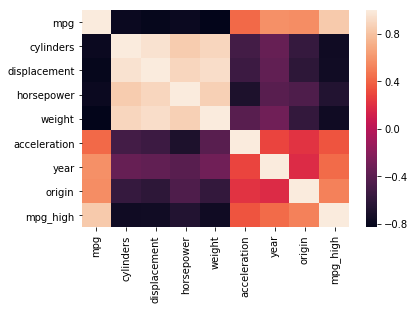

In [16]:
import seaborn as sb
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


% matplotlib inline
sb.heatmap(auto_df.corr())
# Get rid of some regressors that are correlated with each other?

In [17]:
auto_df["constant"] = 1
X = auto_df[["constant", "cylinders", "displacement", "horsepower", 
         "weight", "acceleration", "year", "origin"]].values
y = auto_df["mpg_high"].values

In [18]:
LogitModel = sm.Logit(y, X)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        03:11:55   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.862      -0.021       0.026
x3            -0.0410      0.024     -1.718      0.086      -0.088       0.006
x4            -0.0043      0.001     -3.784      0.000      -0.007      -0.002
x5             0.0161      0.141      0.114      0.910      -0.261       0.293
x6             0.4295      0.075      5.709      0.000       0.282       0.577
x7             0.4773      0.362      1.319      0.187      -0.232       1.187
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Regressors with significant coefficients at 0.05:

"weight" (p-value of 0.000, coefficient of -0.0043) and 
"year" (p-value of 0.000, coefficient of 0.4295) (as well as the constant) 

### b). Divide the data into a training set of half of the data randomly selected and a test set of the remaining half of the data using the .train test split module of the scikit-learn.cross validation package. Set the test size = 0.5 and set the random state=10. 

In [19]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.5, random_state=10)

### c). Use scikit-learn to estimate a logistic regression model on the training data. Report your estimated intercept beta_0 and coefficients (beta_1; beta_2; ... beta_7). [Note. These estimates will be different from the estimates in part (a) because you are only using half the data.]

In [20]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print("Estimated intercept beta_0: ", LogReg.intercept_)
print("Estimated coefficients: ", LogReg.coef_)

Estimated intercept beta_0:  [-0.06931906]
Estimated coefficients:  [[-0.06931906 -0.66396551  0.00574331 -0.03866099 -0.00500018 -0.14203494
   0.30001225 -0.15102627]]


$\beta_0$ = -0.06931906

$\beta_1$ = -0.66396551

$\beta_2$ = 0.00574331

$\beta_3$ = -0.03866099

$\beta_4$ = -0.00500018

$\beta_5$ = -0.14203494

$\beta_6$ = 0.30001225

$\beta_7$ = -0.15102627


### d). Create predicted values of mpg_high for the test set and calculate the confusion matrix and classification report for the Logit model on the test data. Does this model predict low mpg (mpg_high=0) or high mpg (mpg_high=1) better?

In [22]:
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[86 13]
 [12 85]]


We correctly predicted 86 cases of low mpg (true negatives) and 85 cases of high mpg (true positives).

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The model predics low mpg better, but not by much!